In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv("020524.csv")
df

date  strain  number  dots  cells
0   20524     803       1    33     61
1   20524     803       1    25     62
2   20524     803       1    26     56
3   20524     803       1    34     62
4   20524     803       2    33     69
5   20524     803       2    27     55
6   20524     803       2    33     70
7   20524     803       3    32     59
8   20524     803       3    31     57
9   20524     803       3    29     52
10  20524     803       3    38     67
11  20524    1230       1    30     68
12  20524    1230       1    28     60
13  20524    1230       1    29     67
14  20524    1230       1    23     68
15  20524    1230       2    29     77
16  20524    1230       2    32     80
17  20524    1230       2    22     60
18  20524    1230       2    25     77
19  20524    1230       3    21     51
20  20524    1230       3    19     47
21  20524    1230       3    15     58
22  20524    1230       3    20     89

In [3]:
# calculate SE / cells (%)
df_number = df.groupby(["strain", "number"], as_index=False).sum()
df_number["SE"] = df_number["dots"] * 100 / df_number["cells"]
df_number

strain  number   date  dots  cells         SE
0     803       1  82096   118    241  48.962656
1     803       2  61572    93    194  47.938144
2     803       3  82096   130    235  55.319149
3    1230       1  82096   110    263  41.825095
4    1230       2  82096   108    294  36.734694
5    1230       3  82096    75    245  30.612245

In [4]:
# calculate average & sem of SE number in wt and atg18D
SE_mean = df_number.groupby("strain").mean()["SE"].values
SE_sem = df_number.groupby("strain").std()["SE"].values / np.sqrt(3)
print(SE_mean)
print(SE_sem)

[50.73998296 36.39067794]
[2.3086054  3.24143808]


## Welth's t-test

In [5]:
WT_SE = df_number[df_number["strain"] == 803]["SE"]
atg18_SE = df_number[df_number["strain"] == 1230]["SE"]
statistic, atg18_pvalue = stats.ttest_ind(WT_SE, atg18_SE, equal_var=False)
print(atg18_pvalue)

0.026883163202601302


## data visualization

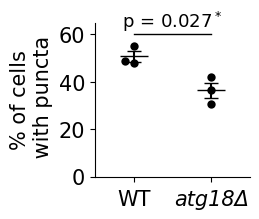

In [6]:
fig, ax = plt.subplots(figsize = (2, 2), dpi=100)

sns.swarmplot(x="strain", y="SE", data=df_number, size=6, color="black")
ax.errorbar(x=[0, 1], y=SE_mean, yerr=SE_sem, capsize=5, fmt='_', ecolor='k', ms=20, mfc='None', mec='k')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fontsize=15
y = -12
ax.text(0, y, "WT", ha="center", fontsize=fontsize)
ax.text(1, y, "atg18Δ", ha="center", fontstyle="italic", fontsize=fontsize)

y_p = 60
ax.plot([0, 1], [y_p, y_p], color='k', lw=1)
ax.text(0.5, y_p+3, f'p = {atg18_pvalue:.3f}$^*$', ha='center', fontsize=fontsize-2)

ax.set_xlim(-0.5, 1.5)
ax.set_ylim(0, 65)
ax.set_xticklabels("")
ax.set_yticks([0, 20, 40, 60])
ax.set_yticklabels(["0", "20", "40", "60"], fontsize=fontsize)
ax.set_xlabel("")
ax.set_ylabel("% of cells\n with puncta", fontsize=fontsize, loc="center")
# save figure
fig.savefig("output.jpg", bbox_inches="tight")
plt.show()